In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import timeit

<AxesSubplot:>

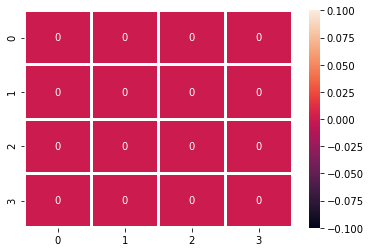

In [2]:
Value = np.zeros((4,4))
sns.heatmap(Value,annot=True,linewidth=2)

In [3]:
walls = (0,1), (0,2),(0,3), (2,0),(2,1),(2,2)
#red = []
terminators = [(0,0)]

In [4]:
walls

((0, 1), (0, 2), (0, 3), (2, 0), (2, 1), (2, 2))

In [5]:
terminators

[(0, 0)]

In [6]:
State_action = np.ones((16,4))*.25
State_action
#######  L     R     T     B

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

In [7]:
def Sweep(Value, Policy,terminators):
    New_Value = Value.copy()
    delta = 0
    x,y = Value.shape
    for i in range(x):  # x
        left = 0
        right = 0
        top = 0
        bottom = 0
        for j in range(y):  # y
            # (i,j)  
            if (i,j) in terminators:
                pass
            else:
                same= New_Value[i,j]
                if i==0:
                    left = same
                else:
                    left = New_Value[i-1,j]
                if i==x-1:
                    right= same
                else:
                    right = New_Value[i+1,j]
                if j==0:
                    top= same
                else:
                    top = New_Value[i,j-1]
                if j==y-1:
                    bottom= same
                else:
                    bottom = New_Value[i ,j+1]
                if (i,j) in walls:
                    transition_reward = -10 #-10  # setting award for wall
                else:
                    transition_reward = -1
                total_value = Policy[(y)*i+j,0]*(transition_reward+left) + Policy[(y)*i+j,1]*(transition_reward+right) + Policy[(y)*i+j,2]*(transition_reward+top) + Policy[(y)*i+j,3]*(transition_reward+bottom)
                #print(total_value, New_Value[i,j])
                delta = max(delta, np.abs(total_value- New_Value[i,j]))
                New_Value[i,j] = total_value 
    print(New_Value)
    print("_"*40)
    return New_Value, delta

In [8]:
def Improve_Policy(Value, Policy):
    New_Policy = Policy.copy()
    #terminators = (0,1), (0,2),(0,3), (2,0),(2,1),(2,2)
    x,y = Value.shape
    for i in range(x):
        for j in range(y):  # y
            # (i,j)  
            left = 0
            right = 0
            top = 0
            bottom = 0
            same= Value[i,j]
            if i==0:
                left = same
            else:
                left = Value[i-1,j]
            if i==x-1:
                right= same
            else:
                right = Value[i+1,j]
            if j==0:
                top= same
            else:
                top = Value[i,j-1]
            if j==y-1:
                bottom= same
            else:
                bottom = Value[i ,j+1]
            my_list = [left,right, top,bottom]
            max_val = max(my_list)
            my_list = np.array(my_list)
            my_list = (my_list==max_val).astype(int)
            my_list = my_list/np.sum(my_list)
            New_Policy[(y)*i+j,:] = my_list
    return New_Policy

In [9]:
call =0
def Evaluate_value(Value, Policy,theta,terminators):
    Policy = Policy.copy()
    theta = theta
    terminators = terminators.copy()
    Policy = Policy.copy()
    global call #no of times policy improved
    call += 1
    #terminators = (0,1), (0,2),(0,3), (2,0),(2,1),(2,2)
    delta = float(np.inf)
    while delta> theta:
        delta = 0
        Value, delta = Sweep(Value, Policy, terminators)
        #print(delta,theta, delta>theta)
    #>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
    New_Policy = Improve_Policy(Value, Policy)
    print("Policy Improved")
    print("*"*40)
    if np.all(Policy==New_Policy):
        return Value, New_Policy, theta, terminators
    else:
        # repeat
        return Evaluate_value(Value, New_Policy,theta, terminators)
        
        

In [10]:
print("calculating...")
start_time = timeit.default_timer()
l,m,th,tr =Evaluate_value(Value,State_action,.01, terminators)
print(timeit.default_timer() - start_time)


calculating...
[[  0.         -10.         -12.5        -13.125     ]
 [ -1.          -3.75        -5.0625      -5.546875  ]
 [-10.25       -13.5        -14.640625    -6.046875  ]
 [ -3.5625      -5.265625    -5.9765625   -4.00585938]]
________________________________________
[[  0.         -16.5625     -21.8125     -23.40234375]
 [ -4.75       -10.96875    -14.2421875  -13.30957031]
 [-18.015625   -22.22265625 -22.12207031 -12.37109375]
 [ -8.6015625  -11.51660156 -11.90527344  -9.07202148]]
________________________________________
[[  0.         -22.3359375  -30.44824219 -32.640625  ]
 [ -9.43359375 -18.05859375 -21.98461914 -21.07647705]
 [-24.56835938 -29.06640625 -28.83184814 -18.83786011]
 [-14.32202148 -17.70257568 -17.87792969 -14.71495819]]
________________________________________
[[  0.         -27.71069336 -38.19604492 -41.13844299]
 [-14.01513672 -24.19421387 -29.074646   -28.53185654]
 [-30.49298096 -35.30540466 -35.27396011 -25.33965874]
 [-20.2098999  -23.77395248 -23.91

In [11]:
# .25*(reward + value)  0.17264579999999796  0.12166369999999915

In [12]:
call  # no of times policy updated

6

In [13]:
print(l) # values

[[  0. -10. -13. -14.]
 [ -1.  -2.  -3.  -4.]
 [-11. -12. -13.  -5.]
 [ -9.  -8.  -7.  -6.]]


In [14]:
print(m) # Policy
# L   R    T  B

[[0.5 0.  0.5 0. ]
 [0.  0.  1.  0. ]
 [0.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [1.  0.  0.  0. ]
 [0.  0.  1.  0. ]
 [0.  0.  1.  0. ]
 [0.  0.  1.  0. ]
 [1.  0.  0.  0. ]
 [1.  0.  0.  0. ]
 [1.  0.  0.  0. ]
 [1.  0.  0.  0. ]
 [0.  0.  0.  1. ]
 [0.  0.  0.  1. ]
 [0.  0.  0.  1. ]
 [1.  0.  0.  0. ]]


<AxesSubplot:>

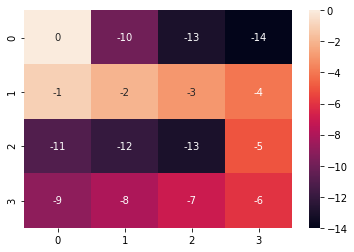

In [15]:
import seaborn as sns
sns.heatmap(l,annot=True)

<AxesSubplot:>

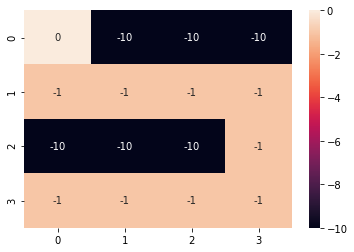

In [16]:
d = -1*np.ones((4,4))
d[0,0]= 0
for i,j in walls:
    d[i,j] = -10
import seaborn as sns
sns.heatmap(d,annot=True)

<AxesSubplot:>

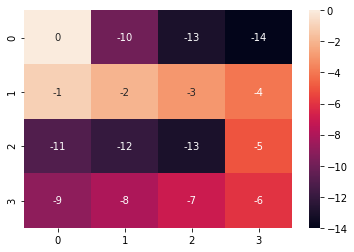

In [17]:
import seaborn as sns
sns.heatmap(l,annot=True)